In [73]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
from sklearn.datasets import fetch_california_housing

In [75]:
data=fetch_california_housing()

In [76]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [80]:
x=pd.DataFrame(data.data,columns=data.feature_names)

In [81]:
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [82]:
y=data.target

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
x_train_full,x_test,y_train_full,y_test=train_test_split(x,y,random_state=42)

In [88]:
x_train,x_valid,y_train,y_valid=train_test_split(x_train_full,y_train_full)

In [89]:
x_train.shape,x_valid.shape,y_train.shape,y_valid.shape,x_test.shape,y_test.shape

((11610, 8), (3870, 8), (11610,), (3870,), (5160, 8), (5160,))

In [90]:
from sklearn.preprocessing import StandardScaler

In [91]:
scaler=StandardScaler()

In [93]:
x_train=scaler.fit_transform(x_train)
x_valid=scaler.transform(x_valid)
x_test=scaler.transform(x_test)

In [95]:
## we are giving x_train as input so we need to know its shape
x_train[0].shape
## it is already flatten so no need to flatten it

(8,)

In [97]:
layers=[tf.keras.layers.Dense(input_shape=x_train[0].shape,units=30,activation='relu',name='inputlayer'),
       tf.keras.layers.Dense(units=10,activation='relu',name='hl1'),
       tf.keras.layers.Dense(units=5,activation='relu',name='hl2'),
       tf.keras.layers.Dense(1,name='output')]
model=tf.keras.models.Sequential(layers)

In [99]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Dense)          (None, 30)                270       
                                                                 
 hl1 (Dense)                 (None, 10)                310       
                                                                 
 hl2 (Dense)                 (None, 5)                 55        
                                                                 
 output (Dense)              (None, 1)                 6         
                                                                 
Total params: 641 (2.50 KB)
Trainable params: 641 (2.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [102]:
loss=tf.keras.losses.mean_squared_error
optimizer='sgd'
metrics=['accuracy']
model.compile(loss=loss,optimizer=optimizer,metrics=metrics)

In [103]:
valid_set=(x_valid,y_valid)
trained_model=model.fit(x_train,y_train,epochs=30,validation_data=valid_set,batch_size=32)

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3071 - accuracy: 0.0030 - val_loss: 0.3237 - val_accuracy: 0.0041
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3075 - accuracy: 0.0030 - val_loss: 0.3129 - val_accuracy: 0.0041
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3078 - accuracy: 0.0030 - val_loss: 0.3226 - val_accuracy: 0.0041
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3097 - accuracy: 0.0030 - val_loss: 0.3134 - val_accuracy: 0.0041
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3066 - accuracy: 0.0030 - val_loss: 0.3137 - val_accuracy: 0.0041
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3030 - accuracy: 0.0030 - val_loss: 0.3109 - val_accuracy: 0.0041
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3033 - accuracy: 0.0030 - val_loss: 0.3109 - val_accuracy: 0.0041
Epoch 

In [104]:
trained_model.params

{'verbose': 1, 'epochs': 30, 'steps': 363}

In [107]:
pd.DataFrame(trained_model.history)

,loss,accuracy,val_loss,val_accuracy
0,0.307119,0.003015,0.323690,0.004134
1,0.307550,0.003015,0.312850,0.004134
2,0.307770,0.003015,0.322557,0.004134
3,0.309721,0.003015,0.313406,0.004134
4,0.306567,0.003015,0.313681,0.004134
5,0.302977,0.003015,0.310855,0.004134
6,0.303258,0.003015,0.310874,0.004134
7,0.301191,0.003015,0.315973,0.004134
8,0.300829,0.003015,0.313553,0.004134
9,0.299353,0.003015,0.319029,0.004134


<AxesSubplot: >

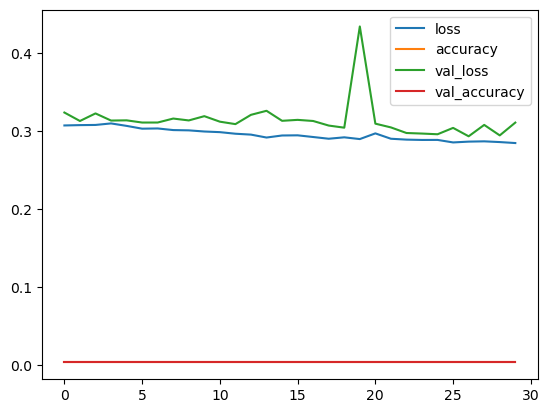

In [108]:
pd.DataFrame(trained_model.history).plot()

In [109]:
model.evaluate(x_test,y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3073 - accuracy: 0.0021


[0.30727118253707886, 0.0021317829377949238]

In [110]:
x_new=x_test[0]

In [111]:
x_new

array([-1.15860007, -0.29094913, -0.48831887, -0.16518039, -0.0257944 ,
        0.10824149,  0.18299342,  0.29583641])

In [112]:
y_actual=y_test[0]

In [113]:
y_actual

0.477

In [114]:
x_new.shape

(8,)

In [117]:
x_new.reshape(1,8)

array([[-1.15860007, -0.29094913, -0.48831887, -0.16518039, -0.0257944 ,
         0.10824149,  0.18299342,  0.29583641]])

In [122]:
y_pred=model.predict(x_new.reshape(1,8))

1/1 [==============================] - 0s 26ms/step


In [123]:
y_pred

array([[0.61671895]], dtype=float32)